**DS - Regression Project - Wine Dataset**


<a href="https://docs.google.com/presentation/d/1zGfdfBoTXsvOvkfewrGETZH5XZLLSg3J/edit?usp=drive_link&ouid=104519793222140349277&rtpof=true&sd=true">Link to Presentation</a>

<a href="https://www.kaggle.com/datasets/elvinrustam/wine-dataset">Link To Kaggle Dataset</a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# For validation
from sklearn.model_selection import train_test_split as split

# The data

We need to predict the price of wine bottles (dataset available [here](https://drive.google.com/drive/folders/1KQXg5CpZ8u59ybkvOnFPzo_WaLHxek_g?usp=sharing)), and we are measured by the RMSLE.

## Get the data

In [ ]:
df_wine= pd.read_csv('WineDataset.csv')

## Eda

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

In [ ]:
df_wine.shape

(1290, 17)

In [ ]:
df_wine.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [ ]:
df_wine.nunique()

Title                        1289
Description                  1283
Price                         128
Capacity                       13
Grape                         113
Secondary Grape Varieties     198
Closure                         4
Country                        25
Unit                           55
Characteristics               888
Per bottle / case / each        3
Type                            7
ABV                            33
Region                         94
Style                          16
Vintage                        30
Appellation                   179
dtype: int64

In [ ]:
df_wine.isnull().sum()

Title                          0
Description                    4
Price                          0
Capacity                       0
Grape                         15
Secondary Grape Varieties    802
Closure                       11
Country                        6
Unit                           9
Characteristics               37
Per bottle / case / each       0
Type                           5
ABV                            9
Region                       166
Style                         78
Vintage                        7
Appellation                  646
dtype: int64

<Axes: xlabel='Type'>

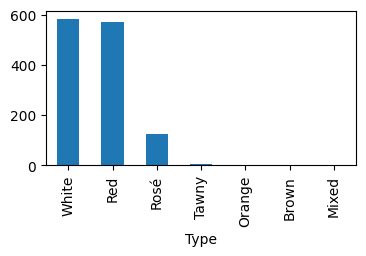

In [ ]:
df_wine.groupby('Type').size().sort_values(ascending=False).plot(kind='bar',figsize=(4,2))

<Axes: xlabel='Grape'>

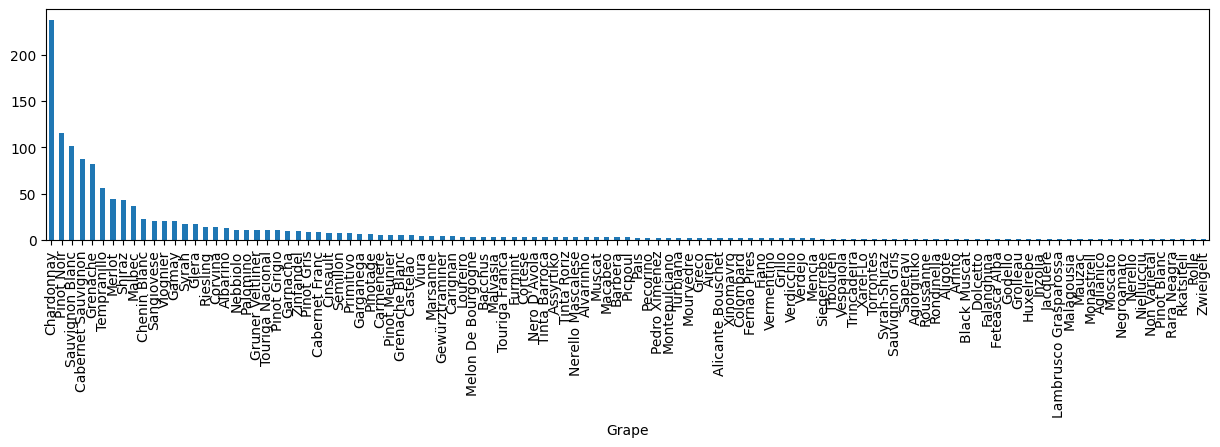

In [ ]:
df_wine.groupby('Grape').size().sort_values(
    ascending=False).plot(kind='bar',figsize=(15,3))

<Axes: xlabel='Closure'>

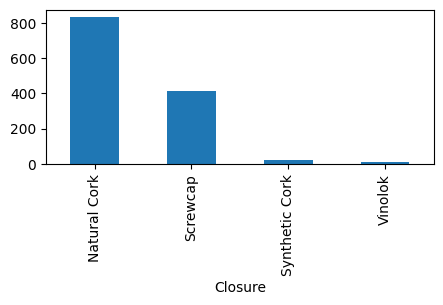

In [ ]:
df_wine.groupby('Closure').size().sort_values(ascending=False).plot(kind='bar',figsize=(5,2))

<Axes: xlabel='Country'>

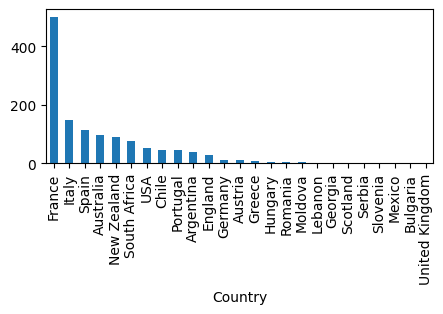

In [ ]:
df_wine.groupby('Country').size().sort_values(ascending=False).plot(kind='bar',figsize=(5,2))

<Axes: xlabel='Region'>

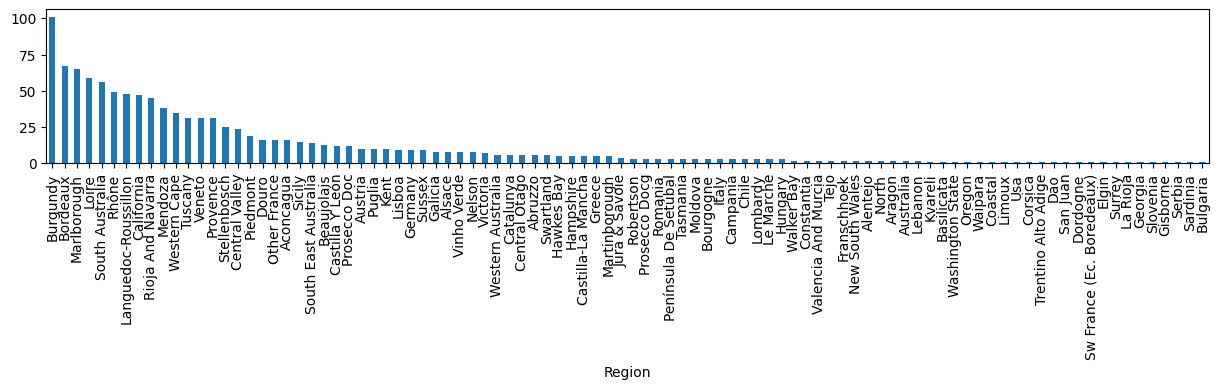

In [ ]:
df_wine.groupby('Region').size().sort_values(ascending=False).plot(kind='bar',figsize=(15,2))

<Axes: xlabel='Style'>

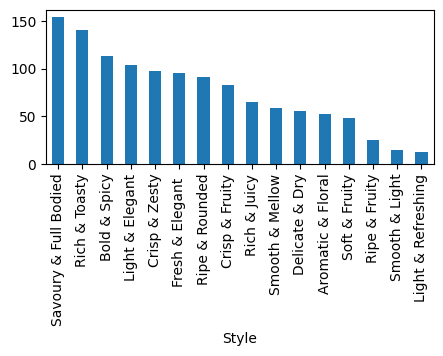

In [ ]:
df_wine.groupby('Style').size().sort_values(ascending=False).plot(kind='bar',figsize=(5,2))

<Axes: xlabel='Vintage'>

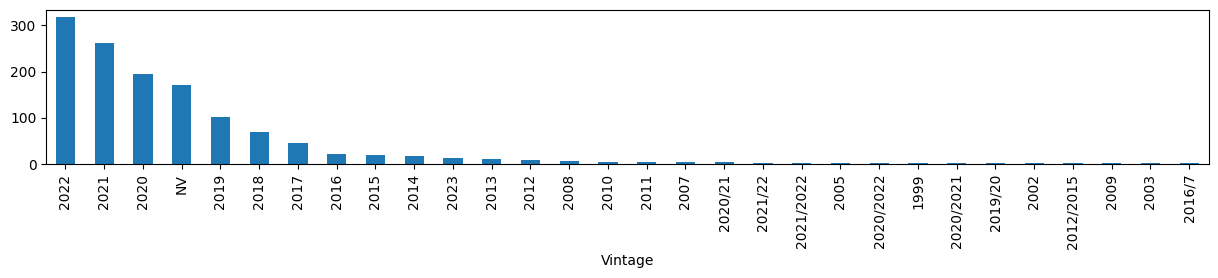

In [ ]:
df_wine.groupby('Vintage').size().sort_values(ascending=False).plot(kind='bar',figsize=(15,2))

In [ ]:
df_wine['Secondary Grape Varieties'].sample(10)

1046        Cabernet Franc
689                    NaN
764                    NaN
990             Chardonnay
619                    NaN
1241                   NaN
296                    NaN
258     Sangiovese, Merlot
541                    NaN
424                    NaN
Name: Secondary Grape Varieties, dtype: object

In [ ]:
df_wine.sample(2)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
484,Château Meyney 'La Chapelle de Meyney' 2016/17...,This 92-point claret is made by Château Meyney...,£26.99 per bottle,75CL,Merlot,Cabernet Sauvignon,Natural Cork,France,10.1,"Cedar, Black Plum, Blackcurrant",per bottle,Red,ABV 13.50%,Bordeaux,Savoury & Full Bodied,2017,Saint-Estéphe
156,Louis Violland Mercurey Blanc 2018/19,Centuries ago Roman legions erected a temple t...,£24.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.5,"Floral, Green Apple, Peach",per bottle,White,ABV 14.00%,Burgundy,Ripe & Rounded,2019,Mercurey


## Cleaning

### Drop non "per bottle" rows


In [ ]:
def drop_non_bottles(df):
    return df.loc[df_wine['Per bottle / case / each']=='per bottle']

In [ ]:
non_bottles_dropper = FunctionTransformer(drop_non_bottles, validate=False)
df_wine = non_bottles_dropper.fit_transform(df_wine)

### Drop non single year from "Vintage" column

In [ ]:
def drop_multiple_year(df,str_cut='/'):
    return df_wine.loc[~df_wine['Vintage'].str.contains(str_cut)]

In [ ]:
multiple_year_dropper = FunctionTransformer(drop_multiple_year, validate=False)
df_wine = multiple_year_dropper.fit_transform(df_wine)

### Drop all non Red/White/Rose wines

In [ ]:
def keep_relevant_types(df):
    return df_wine.loc[(df['Type']=='Red') |
 (df['Type']=='White') | (df['Type']=='Rosé')]

In [ ]:
relevant_types_keeper = FunctionTransformer(keep_relevant_types, validate=False)
df_wine = relevant_types_keeper.fit_transform(df_wine)

### Drop all rows with NaN on ABV/Type columns

In [ ]:
def drop_NaNs_ABV_Type(df):
    df.dropna(subset=['ABV','Type'], inplace=True)
    return df

In [ ]:
NaNs_ABV_Type_dropper = FunctionTransformer(drop_NaNs_ABV_Type, validate=False)
df_wine = NaNs_ABV_Type_dropper.fit_transform(df_wine)

## Features engineering and transform

### Define methods

In [ ]:
def transform_feature_capacity(df,feature_name,str_split,
                               multiplier = 1,drop_and_rename=False):
  feature_name_new = feature_name+'_new'
  df.loc[df[feature_name].str.contains(str_split),feature_name_new
              ] = df[df[feature_name].str.contains(str_split)][
                  feature_name].str.split(
                      str_split, expand=True)[0].astype(float) * multiplier
  if drop_and_rename:
    df.drop([feature_name],axis=1,inplace=True)
    df = df.rename(columns={feature_name_new: feature_name})
    df[feature_name] = df[feature_name].astype(int)
  return df

def create_feature(df,feature_name,feature_name_new,str_contains):
  df.loc[df[feature_name].str.contains(str_contains), feature_name_new] = 1
  df.loc[~df[feature_name].str.contains(str_contains), feature_name_new] = 0
  df[feature_name_new] = df[feature_name_new].astype(int).copy()
  return df

def OneHotEncoder_tranform(df,feature_name):
  ohe = OneHotEncoder(sparse=False).set_output(transform='pandas')
  encoded_ = ohe.fit_transform(df[[feature_name]])
  df = df.merge(encoded_, left_index=True, right_index=True)
  df.drop([feature_name],axis=1,inplace=True)
  return df

def transform_feature_by_quarterly_pr(df,feature_name):
  min_pr = df.Price_per_ml.describe().loc['min']
  quarter_pr = df.Price_per_ml.describe().loc['25%']
  median_pr = df.Price_per_ml.describe().loc['50%']
  three_quarters_pr = df.Price_per_ml.describe().loc['75%']
  max_pr = df.Price_per_ml.describe().loc['max']
  temp_df = df.groupby(feature_name).agg(
      {'Price_per_ml':'median'}).sort_values(by='Price_per_ml',ascending=False)
  cat_25 = temp_df.loc[temp_df['Price_per_ml'].between(min_pr, quarter_pr,
      inclusive = 'left')].index.tolist()
  cat_50 = temp_df.loc[temp_df['Price_per_ml'].between(
      quarter_pr, median_pr,
      inclusive = 'left')].index.tolist()
  cat_75 = temp_df.loc[temp_df['Price_per_ml'].between(
      median_pr, three_quarters_pr,
      inclusive = 'left')].index.tolist()
  cat_100 = temp_df.loc[temp_df['Price_per_ml'].between(
      three_quarters_pr, max_pr,
      inclusive = 'left')].index.tolist()
  del temp_df, min_pr, quarter_pr, median_pr, three_quarters_pr, max_pr
  df[feature_name].fillna(cat_50[0],inplace=True)
  df[feature_name+'_cat'] = df[feature_name].apply(
      lambda x: 1 if x in cat_25 else
                2 if x in cat_50 else
                3 if x in cat_75 else
                4 if x in cat_100 else
                0)
  df.drop([feature_name],axis=1,inplace=True)
  return df

### Transform

In [ ]:
# Init IWC_award feature - checked
df_wine['Description'] = df_wine['Description'].fillna('0')
df_wine = create_feature(df_wine,'Description','IWC_award','IWC')

# Tranform Capacity column - checked
df_wine = transform_feature_capacity(df_wine,'Capacity','CL',10)
df_wine = transform_feature_capacity(df_wine,'Capacity','LTR',1000)
df_wine = transform_feature_capacity(df_wine,'Capacity','ML',1, True)

# Transform Price column - checked

df_wine['Price'] = df_wine['Price'].str.extract(r'(\d+[.\d]*)').astype(float)
df_wine['Price_per_ml'] = df_wine['Price']/df_wine['Capacity']
# Transform ABV column - checked
df_wine['ABV'] = df_wine['ABV'].str.extract(r'(\d+[.\d]*)').astype(float)

# Create Cuvée and Champagne features - checked
df_wine = create_feature(df_wine,'Title','Cuvée', 'Cuvée')
df_wine = create_feature(df_wine,'Title','Champagne', 'Champagne')

# tranform 'Type', 'Style' and 'Closure' features using one hot encoder - checked
# df_wine = OneHotEncoder_tranform(df_wine,'Type')
# df_wine = OneHotEncoder_tranform(df_wine,'Closure')


# transform 'Grape', 'Country' and 'Region' column - checked
df_wine = transform_feature_by_quarterly_pr(df_wine,'Grape')
df_wine = transform_feature_by_quarterly_pr(df_wine,'Country')
df_wine = transform_feature_by_quarterly_pr(df_wine,'Region')

# strip white spaces from columns names
df_wine.rename(columns=lambda x: x.strip(),inplace=True)

# create "Blend" feature
df_wine['Blend'] = df_wine['Secondary Grape Varieties'].apply(
    lambda x: 1 if pd.notnull(x) else 0)

#Transforming Style to numeric catagories
LE=LabelEncoder()
df_wine['Style'] = LE.fit_transform(df_wine['Style'])
LE=LabelEncoder()
df_wine['Type'] = LE.fit_transform(df_wine['Type'])
LE=LabelEncoder()
df_wine['Closure'] = LE.fit_transform(df_wine['Closure'])

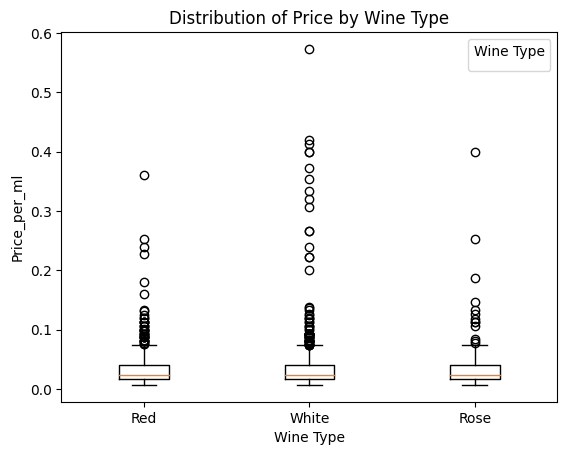

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

wine_types = df_wine['Type'].unique()


# Create lists for boxplot data (ensure all lists have the same length)
boxplot_data = []
for wine_type in wine_types:
    prices = df_wine[df_wine['Type'] == wine_type]['Price_per_ml'].tolist()
    if prices:  # Check if there are prices for this wine type (avoid empty lists)
        boxplot_data.append(prices)

# Create the boxplot (if there's data for all wine types)
if boxplot_data:
    plt.boxplot(boxplot_data, labels=wine_types)
    plt.xlabel('Wine Type')
    plt.xticks([1, 2, 3], ['Red', 'White', 'Rose'])
    plt.ylabel('Price_per_ml')
    plt.title('Distribution of Price by Wine Type')
    plt.legend(title='Wine Type')
    plt.show()
else:
    print("Not enough data for all wine types. Consider alternative visualizations.")

## Removing outliers

### IQR removing outliers  range - on price_per_ml for every wine type

In [ ]:
def remove_iqr_outliers(df, column_name, iqr_multiplier=1.5):

  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (iqr_multiplier * IQR)
  upper_bound = Q3 + (iqr_multiplier * IQR)
  return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

list_df = [df_wine.loc[df_wine['Type']==0],
          df_wine.loc[df_wine['Type']==2],
          df_wine.loc[df_wine['Type']==1]]
for index, df in enumerate(list_df):
 list_df[index] = remove_iqr_outliers(list_df[index].copy(), 'Price_per_ml')
 df_wine = pd.concat(list_df)

In [ ]:
df_wine_red, df_wine_white, df_wine_rose = list_df

# Splitting the data

In [ ]:
columns_arr =['Title', 'Description', 'Price', 'Secondary Grape Varieties',
              'Unit', 'Per bottle / case / each', 'Vintage', 'Appellation',
       'IWC_award', 'Capacity', 'Price_per_ml', 'Cuvée','Characteristics'
       ]
columns_arr2 =['Title', 'Description', 'Secondary Grape Varieties', 'Unit',
       'Per bottle / case / each', 'Vintage', 'Appellation',
       'IWC_award', 'Capacity', 'Price_per_ml', 'Cuvée','Characteristics'
       ]

## All wines data - X,y

In [ ]:
X = df_wine.drop(columns_arr, axis=1)
X2= df_wine.drop(columns_arr2, axis=1)
y = df_wine['Price_per_ml']
X_train, X_test, y_train, y_test = split(
    X, y, test_size=0.3, random_state=314159)

In [ ]:
#Correlation between Price and other features
X2.corr().sort_values(by='Price',ascending=False)['Price']
#Long execution time for the pairplot so commented
# sns.pairplot(X2)

Price          1.000000
Champagne      0.408091
Grape_cat      0.406456
Region_cat     0.361638
Country_cat    0.286948
Blend          0.153864
ABV            0.125177
Type          -0.024408
Style         -0.036517
Closure       -0.302466
Name: Price, dtype: float64

## Splitting to Wine Types - X,y

In [ ]:
X_white = df_wine_white.drop(columns_arr, axis=1)
y_white = df_wine_white['Price_per_ml']
X_red = df_wine_red.drop(columns_arr, axis=1)
y_red = df_wine_red['Price_per_ml']
X_rose = df_wine_rose.drop(columns_arr, axis=1)
y_rose = df_wine_rose['Price_per_ml']
X_train_white, X_test_white, y_train_white, y_test_white = split(
    X_white, y_white, test_size=0.3, random_state=314159)
X_train_red, X_test_red, y_train_red, y_test_red = split(
    X_red, y_red, test_size=0.3, random_state=314159)
X_train_rose, X_test_rose, y_train_rose, y_test_rose = split(
    X_rose, y_rose, test_size=0.3, random_state=314159)

# The Models

## Multi linear regression

### General

In [ ]:
#Fit
lin_model = LinearRegression().fit(X_train, y_train)
#Predict
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)
#Assess
lr_RMSE = mse(y_train,y_train_pred)**0.5
print("train:",lr_RMSE)
#Validate
lr_RMSE = mse(y_test, y_test_pred)**0.5
print("test:",lr_RMSE)

train: 0.011103195402058766
test: 0.010988121840622074


In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final[
    'y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(3)

,Title,Price,Predicted Price
892,Ayala 'Brut Majeur' Extra Age Champagne,49.99,42.74
773,Pasqua 'Romeo & Juliet' Prosecco DOC Rosé 2021/22,13.99,13.69
919,Domaine Reverdy Ducroux ‘Moulin Les Lys’ Sance...,21.99,16.43


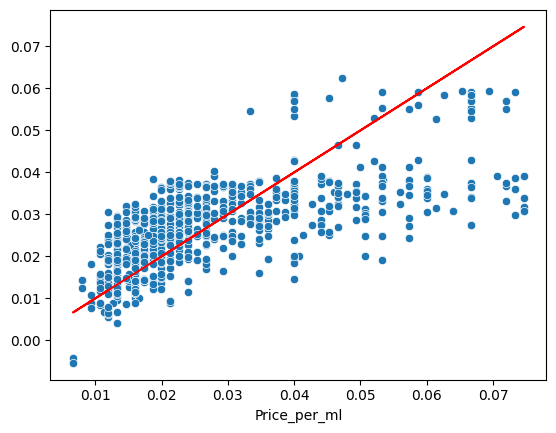

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

### Red

In [ ]:
#Fit
lin_model_red = LinearRegression().fit(X_train_red, y_train_red)
#Predict
y_train_pred_red = lin_model_red.predict(X_train_red)
y_test_pred_red = lin_model_red.predict(X_test_red)
#Assess
lr_red_RMSE = mse(y_train_red,y_train_pred_red)**0.5
print("train:",lr_red_RMSE)
#Validate
lr_red_RMSE = mse(y_test_red, y_test_pred_red)**0.5
print("test:",lr_red_RMSE)

train: 0.01201088497483284
test: 0.012486234799107678


In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train_red, 'y_train_pred': y_train_pred_red})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final['y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(3)

,Title,Price,Predicted Price
1267,Touraine Gamay 2020 Domaine Roc de Châteauvieu...,9.99,17.18
638,"Jackson Estate Vintage Widow Pinot Noir 2016, ...",22.99,18.18
92,Alain Jaume 'Roquedon' Organic Lirac 2018/19,18.99,21.01


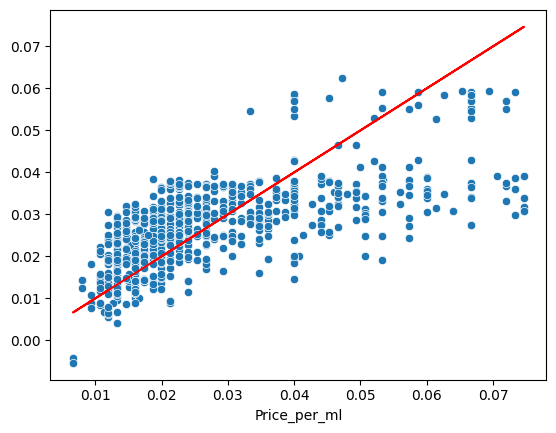

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

### White

In [ ]:
#Fit
lin_model_white = LinearRegression().fit(X_train_white, y_train_white)
#Predict
y_train_pred_white = lin_model_white.predict(X_train_white)
y_test_pred_white =lin_model_red.predict(X_test_white)
#Assess
lr_white_RMSE = mse(y_train_white,y_train_pred_white)**0.5
print("train:",lr_white_RMSE)
#Validate
lr_white_RMSE = mse(y_test_white, y_test_pred_white)**0.5
print("test:",lr_white_RMSE)

train: 0.009755898357023713
test: 0.013787435264303032


In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train_white, 'y_train_pred': y_train_pred_white})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final['y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(3)

,Title,Price,Predicted Price
822,Definition Sauternes 2014 Half Bottle,11.99,12.24
855,"Morgadio Da Torre Alvarinho 2019, Vinho Verde",15.99,8.07
234,Pasqua 'PassioneSentimento' Passimento Bianco ...,12.99,19.72


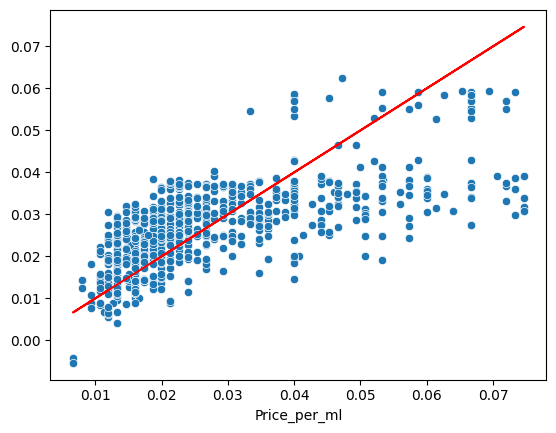

In [ ]:
#Actual vs Predicted
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

### Rose - Not ENOUGH ROWS FOR ROSE WINE TO PREDICT

In [ ]:
#Fit
lin_model_rose = LinearRegression().fit(X_train_rose, y_train_rose)
#Predict
y_train_pred_rose = lin_model_rose.predict(X_train_rose)
y_test_pred_rose =lin_model_red.predict(X_test_rose)
#Assess
lr_rose_RMSE = mse(y_train_rose,y_train_pred_rose)**0.5
print("train:",lr_rose_RMSE)
#Validate
lr_rose_RMSE = mse(y_test_rose, y_test_pred_rose)**0.5
print("test:",lr_rose_RMSE)

train: 0.0073594345012363204
test: 0.01751587061685515


## Decision Trees

### Build model

In [ ]:
dt_model_1 = DecisionTreeRegressor(max_leaf_nodes=22).fit(X_train, y_train)
y_train_pred = dt_model_1.predict(X_train)
dt_RMSE = mse(y_train, y_train_pred)**0.5
dt_RMSE = mse(y_train, y_train_pred)**0.5

Grape_cat      0.371070
Champagne      0.168954
ABV            0.144546
Closure        0.134330
Region_cat     0.092009
Style          0.047053
Blend          0.042038
Type           0.000000
Country_cat    0.000000
dtype: float64

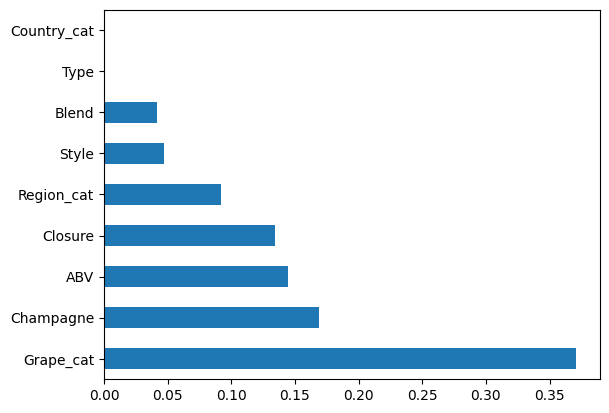

In [ ]:
pd.Series(dt_model_1.feature_importances_, index=X.columns).sort_values(ascending=False).plot.barh()
pd.Series(dt_model_1.feature_importances_, index=X.columns).sort_values(ascending=False)

In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final['y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(5)

,Title,Price,Predicted Price
123,La Toledana Gavi di Gavi DOCG 2021,15.99,16.56
72,"Klein Constantia Sauvignon Blanc 2020/21, Cons...",15.99,14.15
181,Domäne Wachau 'Weingärten Weissenkirchen' Grün...,13.99,10.13
1207,"Radford Dale 'Freedom' Pinot Noir 2019/21, Elgin",26.99,20.74
327,Beronia Rioja Reserva 2018/19,17.99,20.74


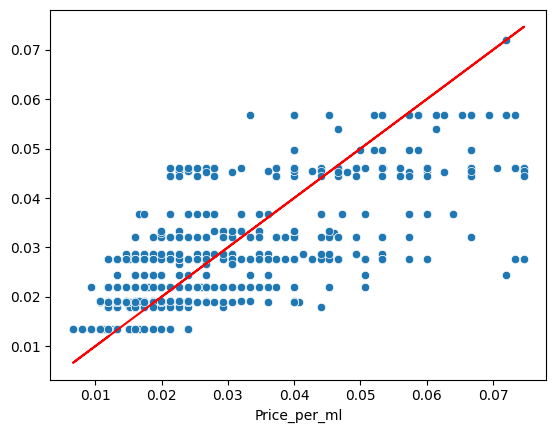

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

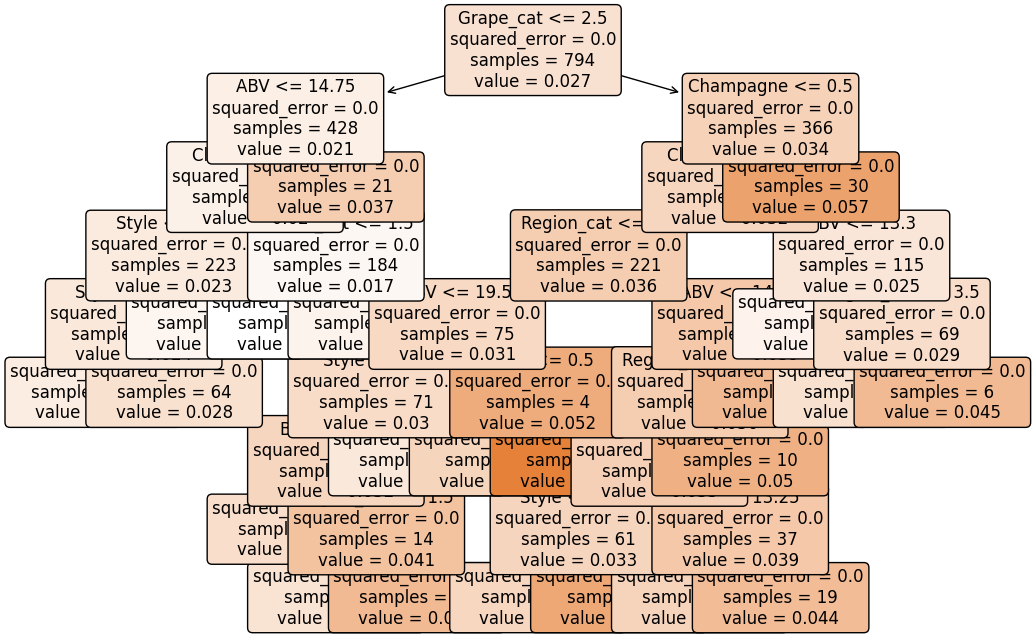

In [ ]:
from sklearn.tree import plot_tree
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True,
            fontsize=12);
visualize_tree(dt_model_1, md=10)

In [ ]:
dt_RMSE = mse(y_train, y_train_pred)**0.5
print('Train',dt_RMSE)
dt_RMSE = mse(y_test, y_test_pred)**0.5
print('Test',dt_RMSE)

Train 0.009975996530750248
Test 0.010988121840622074


### Hyper parameters tuning/optimization (Manual, without using gridsearch - later project we'll be using gridsearch)

In [ ]:
##### left in comment because was used only for optimizing the model
##### but kept for record

# sub_X_train, sub_X_test, sub_y_train, sub_y_test = split(
#    X, y, random_state=1415)

# # complexity = range(2, 15 , 1)
# # scores = pd.DataFrame(index=complexity, columns=['train', 'test'])
# # sub_X_train
# # for leafs in complexity:
# #     model = DecisionTreeRegressor(max_leaf_nodes=leafs).fit(
# #   sub_X_train, sub_y_train)

# #     sub_y_train_pred = model.predict(sub_X_train)
# #     scores.loc[leafs, 'train'] = mse(sub_y_train_pred, sub_y_train) ** 0.5

# #     sub_y_test_pred = model.predict(sub_X_test)
# #     scores.loc[leafs, 'test'] = mse(sub_y_test_pred, sub_y_test) ** 0.5
# # squared_error, friedman_mse, absolute_error, poisson
# round(leafs,5)
# complexity = np.linspace(0.00001,0.4, 3)
# # complexity = range(2, 30 , 1)
# scores = pd.DataFrame(index=complexity, columns=['train', 'test'])
# dt_model_1.fit(X_train, y_train)
# for leafs in complexity:
#         # print(round(leafs,2))
#         model = DecisionTreeRegressor(max_leaf_nodes=10,
#                                       min_samples_leaf = 0.15,
#                                       criterion='poisson'
#                                       ).fit(X_train, y_train)

#         sub_y_train_pred = model.predict(X_train)
#         scores.loc[leafs, 'train'] = (mse(sub_y_train_pred, y_train) ** 0.5)

#         sub_y_test_pred = model.predict(X_test)
#         scores.loc[leafs, 'test'] = (mse(sub_y_test_pred, y_test) ** 0.5)


# complexity = np.linspace(0.00001,0.002, 100)
# # complexity = range(2, 30 , 1)
# scores = pd.DataFrame(index=complexity, columns=['train', 'test'])
# dt_model_1.fit(X_train, y_train)
# for leafs in complexity:
#         # print(round(leafs,2))
#         model = DecisionTreeRegressor(max_leaf_nodes=10,
#                                       min_samples_leaf = 0.1,
#                                       criterion='squared_error').fit(X_train, y_train)

#         sub_y_train_pred = model.predict(X_train)
#         scores.loc[leafs, 'train'] = (mse(sub_y_train_pred, y_train) ** 0.5)*750

#         sub_y_test_pred = model.predict(X_test)
#         scores.loc[leafs, 'test'] = (mse(sub_y_test_pred, y_test) ** 0.5)*750

### Fit model after optimization

In [ ]:
dt_model_1 = DecisionTreeRegressor(max_leaf_nodes=10,
                              min_samples_leaf = 0.15,
                              criterion='squared_error').fit(X_train, y_train)
y_train_pred = dt_model_1.predict(X_train)
y_test_pred = dt_model_1.predict(X_test)
dt_RMSE = mse(y_train,y_train_pred)**0.5
print("train:",dt_RMSE)
dt_RMSE = mse(y_test, y_test_pred)**0.5
print("test:",dt_RMSE)

train: 0.012660085426859981
test: 0.012946279355911592


In [ ]:
from sklearn.tree import plot_tree
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True,
            fontsize=12);

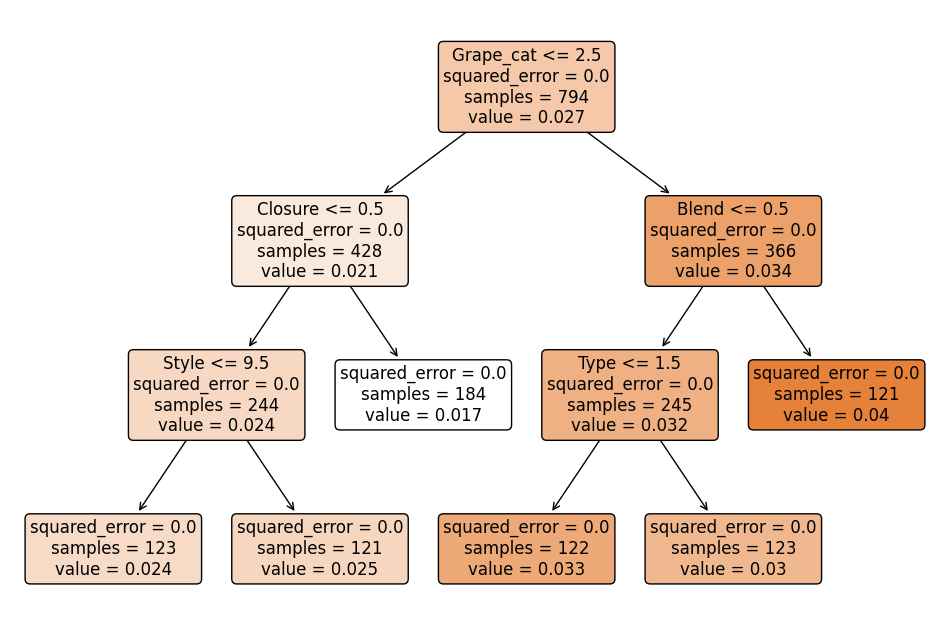

In [ ]:
visualize_tree(dt_model_1, md=10)

In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final['y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(5)

,Title,Price,Predicted Price
1027,Bodegas Roda Rioja Reserva 2016/17,33.99,18.42
709,"Shaw + Smith Sauvignon Blanc 2022/23, Adelaide...",20.99,12.75
542,Alphonse Mellot 'Les Demoiselles' Organic Sanc...,39.99,24.74
851,LB7 Vinho Verde DOC 2021/22,8.99,12.75
1106,"Kangarilla Road Chardonnay 2020/21, Adelaide H...",13.99,22.63


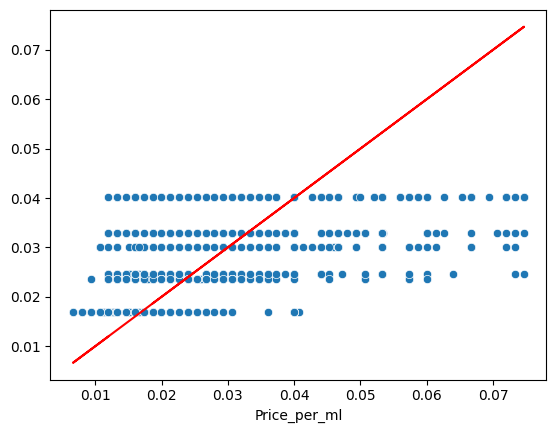

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

## KNN

In [ ]:
#Fit
knn_model_1 = KNeighborsRegressor(n_neighbors=60).fit(X_train, y_train)

In [ ]:
#Predict
y_train_pred = knn_model_1.predict(X_train)

In [ ]:
#Assess
train_RMSE = mse(y_train, y_train_pred)**0.5
print('Train score:', train_RMSE)
#Validate
test_RMSE = mse(y_test, y_test_pred)**0.5
print('Test Score:' ,test_RMSE)

Train score: 0.012350057735427172
Test Score: 0.012946279355911592


In [ ]:
#Present predictions
pd_final=pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred})
pd_final= pd_final.join(df_wine[['Capacity','Title']])
pd_final['Predicted Price'] = round((pd_final['y_train_pred'] * pd_final['Capacity']),2)
pd_final['Price'] = pd_final['y_train'] * pd_final['Capacity']
pd_final[['Title','Price','Predicted Price']].sample(5)

,Title,Price,Predicted Price
583,"Cuvée de Richard Rouge 2021/22, France",8.99,13.27
1262,"Tinto Pesquera Reserva 2017/18, Ribera del Duero",32.99,25.09
1118,Lanson Le Vintage 2009,49.99,24.63
794,"Incanta Chardonnay 2021, Romania",8.99,17.29
176,Les Grandes Serres ‘Hommage du Rhône’ Châteaun...,25.99,22.27


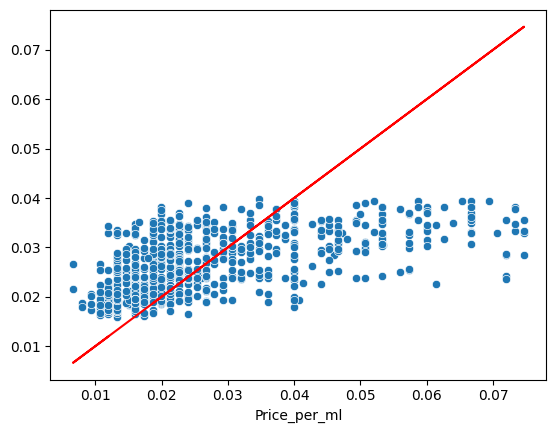

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')